## Latihan Machine Learning : Customer Churn Prediction

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path


In [2]:
# Import dataset
df_load = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Tampilkan bentuk dari dataset
print(df_load.shape)

# Tampilkan 5 data teratas
print(df_load.head())

# Tampilkan jumlah ID yang unik
print(df_load.customerID.nunique())


(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [4]:
# Import matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns



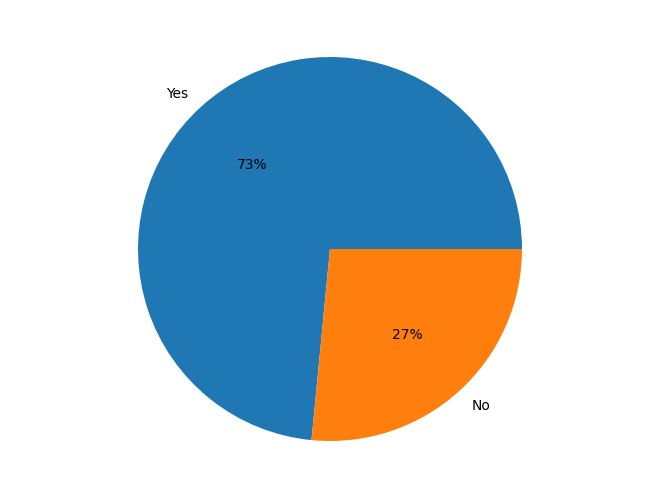

In [5]:
from matplotlib import pyplot as plt
import numpy as np

# Membuat figure
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')  # Membuat tampilan pie chart menjadi lingkaran

# Label untuk pie chart
labels = ['Yes', 'No']

# Menghitung jumlah nilai pada kolom 'Churn'
churn = df_load.Churn.value_counts()

# Membuat pie chart
ax.pie(churn, labels=labels, autopct='%.0f%%')

# Menampilkan pie chart
plt.show()


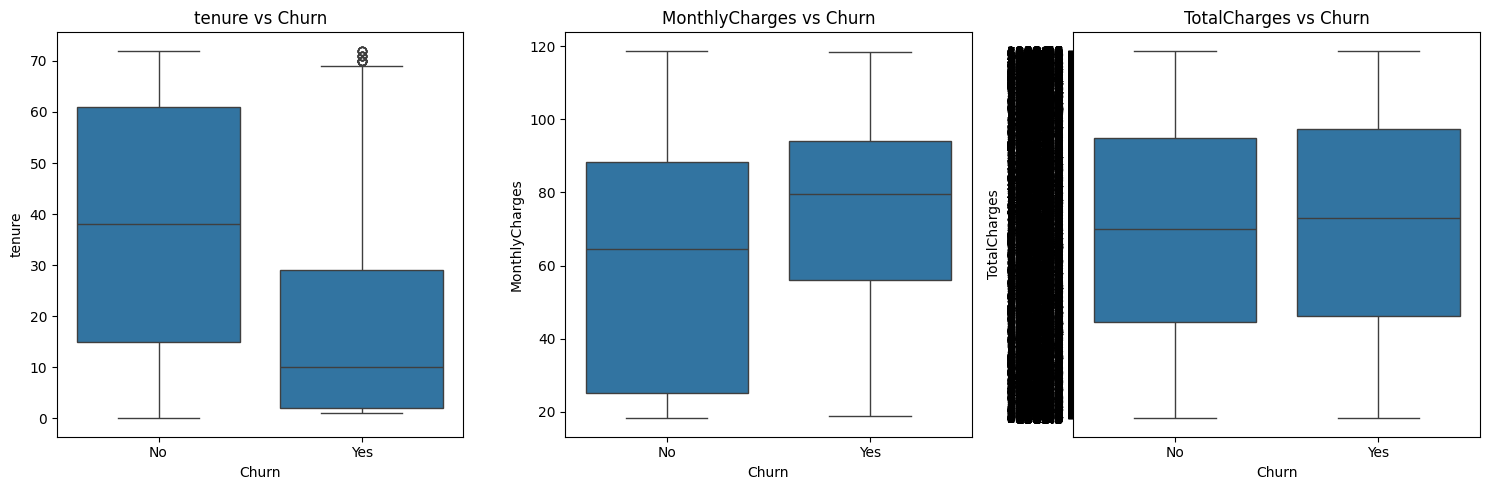

In [10]:
# Visualisasi variabel numerik
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(num_cols):
    # Use df_load instead of df to access the DataFrame
    sns.boxplot(y=df_load[col], x=df_load['Churn'], ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

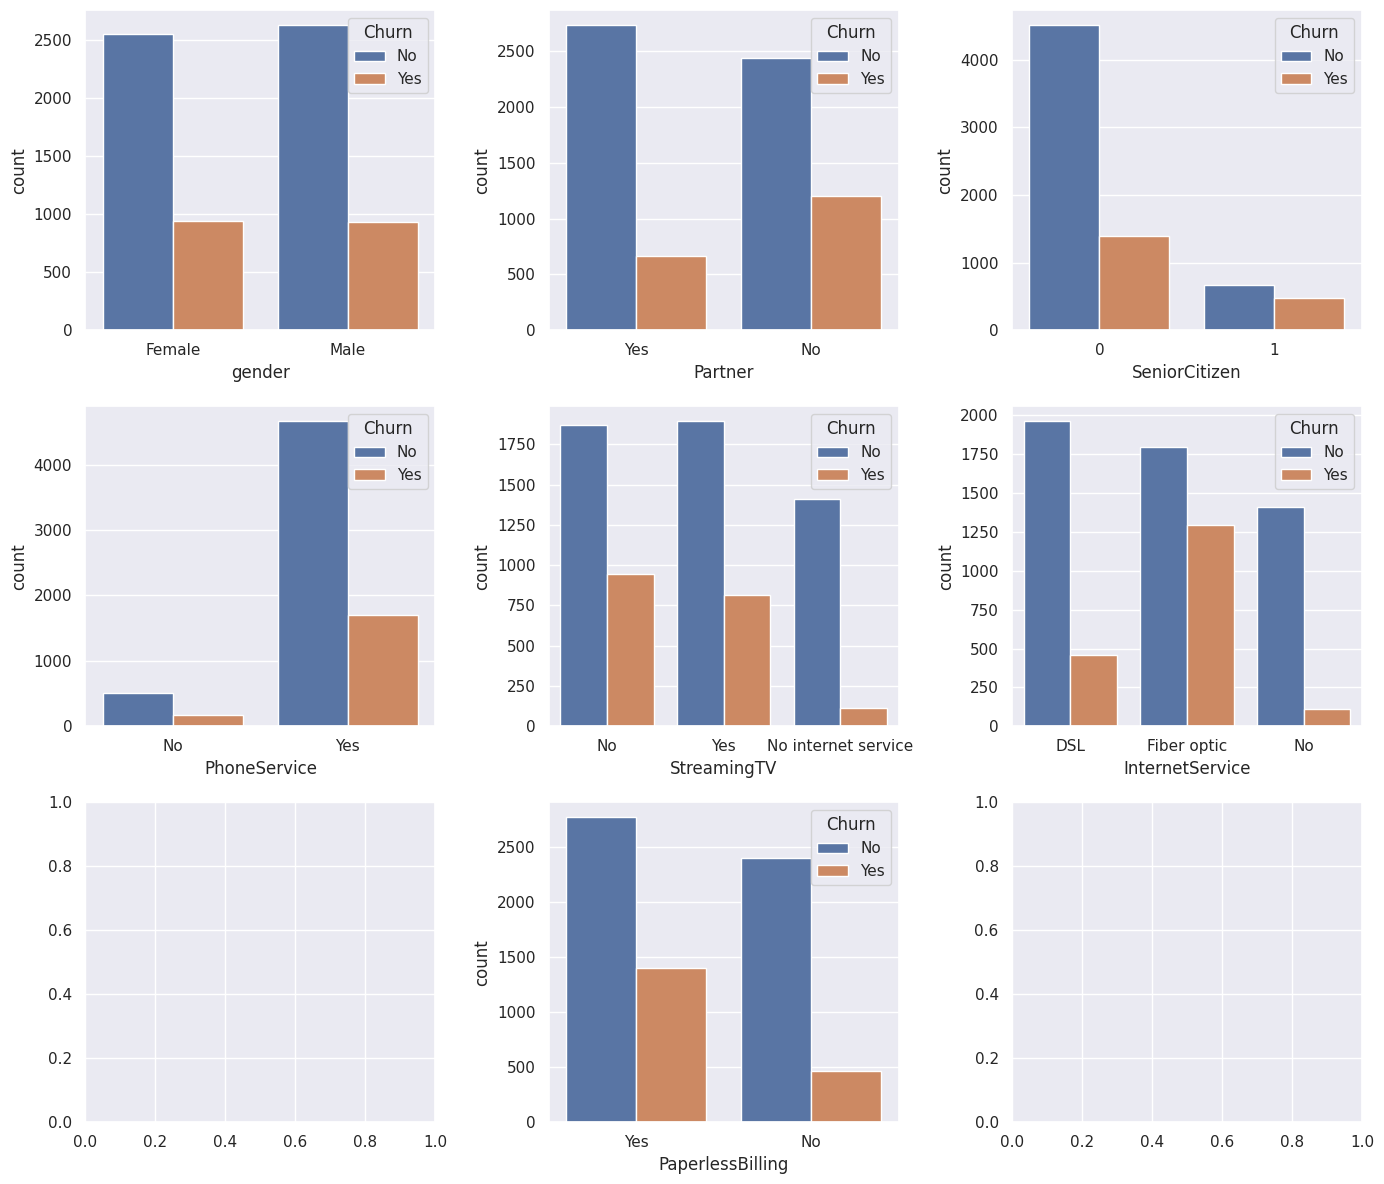

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Mengatur gaya seaborn
sns.set(style='darkgrid')

# Membuat subplot dengan 3 baris dan 3 kolom
fig, ax = plt.subplots(3, 3, figsize=(14, 12))

# Membuat countplot untuk setiap variabel kategorik dengan hue 'Churn'
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])

# Menyesuaikan tata letak agar tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()


In [18]:
# Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID'], axis=1)
print(cleaned_df.head())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [19]:
from sklearn.preprocessing import LabelEncoder

# Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

print(cleaned_df.describe())


            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.940508         0.872923        0.790004   
std        0.295752       0.948554         0.737796        0.859848   
min        0.000000       0.000

<ipython-input-19-c16e079b8921>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-19-c16e079b8921>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-19-c16e079b8921>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-19-c16e079b8921>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-19-c16e079b8921>:5: DeprecationWa

In [20]:
from sklearn.model_selection import train_test_split

# Predictor dan target
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,
      ', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)

print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))

print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,
      ', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)

print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))


Jumlah baris dan kolom dari x_train adalah: (4930, 19) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4930,)
Prosentase Churn di data Training adalah:
Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2113, 19) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2113,)
Prosentase Churn di data Testing adalah:
Churn
0    0.728348
1    0.271652
Name: proportion, dtype: float64


In [24]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model
log_model = LogisticRegression()

# Melatih model dengan data train
log_model.fit(x_train, y_train)  # Menggunakan x_train sebagai data training


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

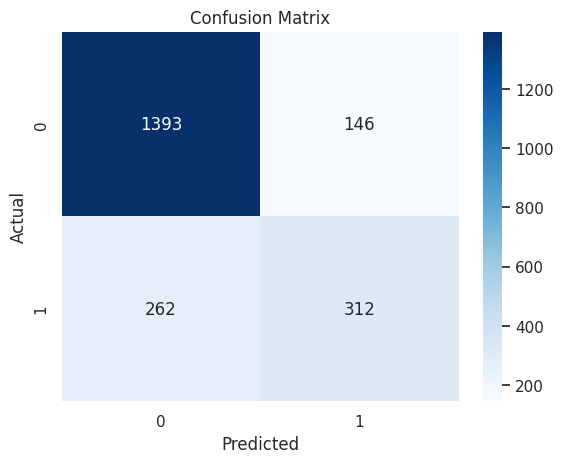

In [25]:
# prompt: tampilkan confusion matrixnya

import matplotlib.pyplot as plt
# Predict the model using the test data
y_pred = log_model.predict(x_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
# prompt: tampilkan akurasinya

# Print classification report to show precision, recall, F1-score, and accuracy
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.54      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113

